# MAPD mod.A : Exercise 2

## 1. - Settings

### 1.1. - Import uHAL and other useful packages

In [1]:
import uhal
import numpy as np
import matplotlib.pyplot as plt

from random import randrange, seed
from scipy import signal
from scipy.signal import freqz

seed(123456)

### 1.2. - Connect to the board

In [2]:
manager = uhal.ConnectionManager("file://arty7_connection.xml")
hw = manager.getDevice("arty7")

### 1.3. - Useful variables

In [3]:
N = 1024 #DPRAM dimension
c = [193, 203, 206, 203, 193] #FIR coefficients

## 2. - Write test data into the DPRAM of the hardware

### 2.1. - Set all the numbers in the DPRAM to 0

In [4]:
data_to_write=[0]*N
data = hw.getNode('regs').writeBlock(data_to_write)
hw.dispatch()

### 2.2. - Write numbers from 1 to 500

In [5]:
data_to_write=range(1,501)
data = hw.getNode('regs').writeBlock(data_to_write)
hw.dispatch()

## 3. - Read the DPRAM memory of the hardware

In [6]:
data  = hw.getNode('regs').readBlock(N)
hw.dispatch()
i_fir = data.value()[:512]
o_fir = data.value()[512:]
print "FIR input :\n", i_fir, "\n\n"
print "FIR output:\n", o_fir

FIR input :
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

## 4. - FIR filter results

### 4.1. - Second half of the DPRAM (where results are stored)

In [7]:
print "FIR output:\n", o_fir

FIR output:
[0, 193, 396, 795, 1394, 2189, 2994, 3992, 4990, 5988, 6986, 7984, 8982, 9980, 10978, 11976, 12974, 13972, 14970, 15968, 16966, 17964, 18962, 19960, 20958, 21956, 22954, 23952, 24950, 25948, 26946, 27944, 28942, 29940, 30938, 31936, 32934, 33932, 34930, 35928, 36926, 37924, 38922, 39920, 40918, 41916, 42914, 43912, 44910, 45908, 46906, 47904, 48902, 49900, 50898, 51896, 52894, 53892, 54890, 55888, 56886, 57884, 58882, 59880, 60878, 61876, 62874, 63872, 64870, 65868, 66866, 67864, 68862, 69860, 70858, 71856, 72854, 73852, 74850, 75848, 76846, 77844, 78842, 79840, 80838, 81836, 82834, 83832, 84830, 85828, 86826, 87824, 88822, 89820, 90818, 91816, 92814, 93812, 94810, 95808, 96806, 97804, 98802, 99800, 100798, 101796, 102794, 103792, 104790, 105788, 106786, 107784, 108782, 109780, 110778, 111776, 112774, 113772, 114770, 115768, 116766, 117764, 118762, 119760, 120758, 121756, 122754, 123752, 124750, 125748, 126746, 127744, 128742, 129740, 130738, 131736, 132734, 133732, 134730,

### 4.2. - Simulation of the FIR filter on python

In [8]:
i_sim = [0,0,0,0,0,0] + list(data_to_write)

o_sim = []

for i in range(len(c)-1,len(i_sim)):
    a=0
    for j in range(len(c)):
        a += i_sim[i-j]*c[j]
    o_sim.append(a)

In [9]:
o_sim, o_fir

([0,
  0,
  193,
  589,
  1191,
  1996,
  2994,
  3992,
  4990,
  5988,
  6986,
  7984,
  8982,
  9980,
  10978,
  11976,
  12974,
  13972,
  14970,
  15968,
  16966,
  17964,
  18962,
  19960,
  20958,
  21956,
  22954,
  23952,
  24950,
  25948,
  26946,
  27944,
  28942,
  29940,
  30938,
  31936,
  32934,
  33932,
  34930,
  35928,
  36926,
  37924,
  38922,
  39920,
  40918,
  41916,
  42914,
  43912,
  44910,
  45908,
  46906,
  47904,
  48902,
  49900,
  50898,
  51896,
  52894,
  53892,
  54890,
  55888,
  56886,
  57884,
  58882,
  59880,
  60878,
  61876,
  62874,
  63872,
  64870,
  65868,
  66866,
  67864,
  68862,
  69860,
  70858,
  71856,
  72854,
  73852,
  74850,
  75848,
  76846,
  77844,
  78842,
  79840,
  80838,
  81836,
  82834,
  83832,
  84830,
  85828,
  86826,
  87824,
  88822,
  89820,
  90818,
  91816,
  92814,
  93812,
  94810,
  95808,
  96806,
  97804,
  98802,
  99800,
  100798,
  101796,
  102794,
  103792,
  104790,
  105788,
  106786,
  107784,
  1087

### 4.3. - Comparison of the results on harware with simulation

In [10]:
print([o_fir[i] == o_sim[i] for i in range(len(o_sim))])

[True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True

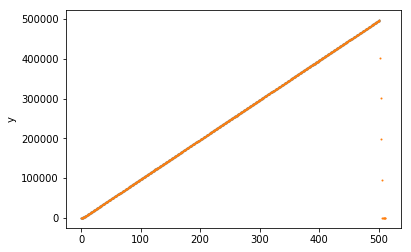

In [11]:
plt.plot(o_sim, 'o', markersize=1, label='Simulation')
plt.plot(o_fir, 'o', markersize=1, label='Hardware')
plt.ylabel('y')
plt.show()

## 5. - Test 

### 5.1. - Sine input wave

In [12]:
file1 = open("input_vectors.txt","w")

nsamples  = 1000
fs        = 500
frequency = 1
power     = 10
shift     = np.power(2,power)
x         = np.arange(nsamples)
signal1   = np.sin(2 * np.pi * frequency * x / fs)

v = []

for i in signal1:
    p = np.abs(np.int((i + 1)* np.power(2,power)))
    file1.write(str(p))
    file1.write("\n")
    v.append(p)

i_fir = v - shift

file1.close()

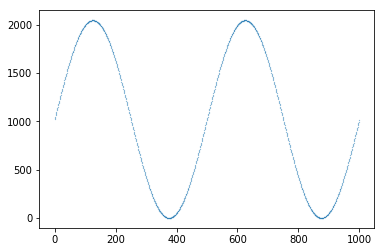

In [13]:
plt.plot(np.arange(0,len(v)),v,'o',markersize=0.2)
plt.show()

In [14]:
data_to_write=[0]*N
data = hw.getNode('regs').writeBlock(data_to_write)
hw.dispatch()
data_to_write=v[0:500]
data = hw.getNode('regs').writeBlock(data_to_write)
hw.dispatch()
data  = hw.getNode('regs').readBlock(N)
hw.dispatch()
o_fir = data.value()[512:] - shift*sum(c)
print "FIR output:\n", o_fir

FIR output:
[-1021952  -824320  -616448  -403188  -190371    14881    25143    37924
    50898    63679    76450    89218   101989   114770   127551   140322
   153090   165668   178246   191014   203592   216170   228745   241313
   253695   266070   278442   290814   302996   315175   327344   339320
   351296   363272   375248   387224   399200   410983   422756   434526
   446106   457686   469263   480640   491821   502992   513970   524948
   535926   546904   557689   568464   579043   589615   600001   610380
   620563   630736   640716   650696   660483   670260   679841   689415
   698803   708184   717369   726544   735526   744315   753094   761677
   770253   778643   787026   795213   803197   810978   818563   826141
   833533   840918   848107   855286   862272   869065   875848   882435
   888822   895013   901194   906989   912774   918363   923945   929341
   934730   939923   944913   949700   954291   958682   962877   967062
   971054   975046   978845   982441   

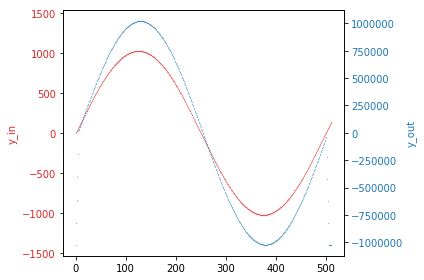

In [15]:
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.set_ylabel('y_in', color=color)
ax1.plot(np.arange(0,len(o_fir)), i_fir[0:len(o_fir)], 'o', markersize=0.2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([min(i_fir)*1.5, max(i_fir)*1.5])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('y_out', color=color)
ax2.plot(np.arange(0,len(o_fir)), o_fir, 'o', markersize=0.2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## FIR filter coefficients

coefficients [10e3]: 
[130 142 150 152 150 142 130]


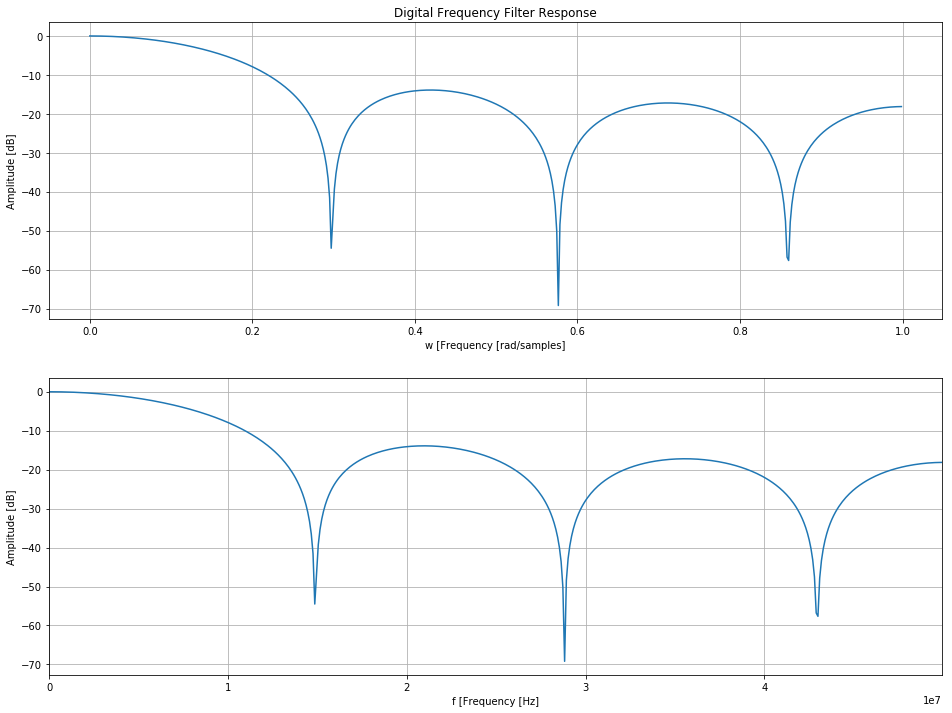

In [16]:
fs = 100000000.0 # Hz -- Arty7 board frequency oscillator
b = signal.firwin(7, 0.1, window='boxcar')   # 4 in the number of the coefficients 
                                             # 0.1 is the cutoff frequency
w, h = signal.freqz(b)
print "coefficients [10e3]: "
print np.array(np.floor(b*1000)).astype(int)

fig = plt.figure()
fig.set_size_inches(16, 12, forward=True)
ax1 = fig.add_subplot(211)   
ax1.plot(w/3.14, 20*np.log10(abs(h))) 
ax1.set_xlabel('w [Frequency [rad/samples]')
ax1.set_ylabel('Amplitude [dB]')
ax1.set_title('Digital Frequency Filter Response')
ax1.grid()
ax2 = fig.add_subplot(212)
ax2.plot(w/3.14*fs/2, 20*np.log10(abs(h))) 
ax2.set_xlim(min(w/3.14*fs/2), max(w/3.14*fs/2))
ax2.set_xlabel('f [Frequency [Hz]')
ax2.set_ylabel('Amplitude [dB]')
ax2.grid()
plt.show()

In [17]:
[hex(int(b[i]*1000)) for i in range(len(b))]

['0x82', '0x8e', '0x96', '0x98', '0x96', '0x8e', '0x82']